In [1]:
import tweepy
from textblob import TextBlob
import re
import string
import pandas as pd
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import numpy as np
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df=pd.read_csv('raw_data.csv')
df1=pd.read_csv('uncleaned1.csv')


In [3]:
def remove_user(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i," ",input_txt)
    return input_txt

df['Tweet'] = np.vectorize(remove_user)(df['Tweet'], "@[\w]*")
df

,Unnamed: 0,User,Tweet,Location,Retweet Count,Date
0,0,pallaviaswal,RT : Launched #SAHAS World's first #entrepr...,Delhi,6,2020-06-12 16:29:49
1,1,BharatGundagoni,"Today video conference of Bjym Nizambad Dist,a...","Hyderabad, India",0,2020-06-12 16:29:15
2,2,AjayPandey__,RT : Some people think #boycottchina is impra...,"New Delhi, India",37,2020-06-12 16:22:30
3,3,ManojGoelBJP,Creating short-term job opportunities for #mig...,"New Delhi, India",0,2020-06-12 16:20:23
4,4,delhi_iihm,RT : Launched #SAHAS World's first #entrepr...,NaN,6,2020-06-12 16:19:16
...,...,...,...,...,...,...
15853,15853,All4Congress,"With the biggest-ever jump on Friday\n- 9,851 ...","Karnataka, India",4,2020-06-06 01:12:41
15854,15854,Newaashirainwe1,Chance makes our parents; but choice makes our...,"Gujarat, India",0,2020-06-06 01:06:25
15855,15855,Shalini86442066,RT : The news that 69 yrs old #AtlasCycle Com...,NaN,405,2020-06-06 01:06:00
15856,15856,Ashokghanghas2,RT : 2/2\n• Greece: allowance of €800\n• Sout...,"Haryana, India",69,2020-06-06 01:05:18


In [25]:
df['Tweet'].value_counts()

RT  : That hilarious moment when you find   Using 2017 Akhilesh Yadav's Regime picture to take a jibe at  Modi's #A…                              2608
RT  : Ram Ram ji 🙏 Support this cause Indians 🙏 #AtmanirbharBharatAbhiyan #AtmaNirbharBharat #payalrohatgi https://t.co/jev6Si…                   1088
RT  : The call for #BoycottChina may have good intentions.\n(who dose't want an #AtmaNirbharBharat)\nBut do we forget that China…                  775
RT  : Bankers Request\n\n👉   \n👉   \n👉   \n👉   \n\nTo deny the Media Reports that "Govt  have initi…                                               403
RT  : Maharashtra: Grahak Peth, a cooperative dept store in Pune has labelled items as ‘swadeshi’ &amp; ‘videshi'. S Pathak, MD Grahak Peth…       372
                                                                                                                                                  ... 
Eashwar resident of Neredcherla of #Suryapet dist #Telangana, is private employee thanking the

In [26]:
#data cleaning using regular expression that is removing Hashtags ,@ , symbols from the tweets

df['Cleaned_tweet'] = df.Tweet.str.replace('@user', '')
df['Cleaned_tweet'] = df['Cleaned_tweet'].str.replace("[^a-zA-Z#]"," ")
df['Cleaned_tweet'] = df['Cleaned_tweet'].str.replace("#", " ")
df.head()

,User,Tweet,Location,Retweet Count,Date,Cleaned_tweet,polarity,Sentiment
0,pallaviaswal,RT : Launched #SAHAS World's first #entrepr...,Delhi,6,2020-06-12 16:29:49,RT Launched SAHAS World s first entrepr...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Neutral
1,BharatGundagoni,"Today video conference of Bjym Nizambad Dist,a...","Hyderabad, India",0,2020-06-12 16:29:15,Today video conference of Bjym Nizambad Dist a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,AjayPandey__,RT : Some people think #boycottchina is impra...,"New Delhi, India",37,2020-06-12 16:22:30,RT Some people think boycottchina is impra...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,ManojGoelBJP,Creating short-term job opportunities for #mig...,"New Delhi, India",0,2020-06-12 16:20:23,Creating short term job opportunities for mig...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",Positive
4,delhi_iihm,RT : Launched #SAHAS World's first #entrepr...,NaN,6,2020-06-12 16:19:16,RT Launched SAHAS World s first entrepr...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Neutral


In [27]:
df['Cleaned_tweet']

0        RT      Launched  SAHAS World s first  entrepr...
1        Today video conference of Bjym Nizambad Dist a...
2        RT    Some people think  boycottchina is impra...
3        Creating short term job opportunities for  mig...
4        RT      Launched  SAHAS World s first  entrepr...
                               ...                        
15853    With the biggest ever jump on Friday         n...
15854    Chance makes our parents  but choice makes our...
15855    RT    The news that    yrs old  AtlasCycle Com...
15856    RT          Greece  allowance of        South ...
15857    RT    The news that    yrs old  AtlasCycle Com...
Name: Cleaned_tweet, Length: 15858, dtype: object

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1

,User,Tweet,Location,Retweet Count,Date
0,pallaviaswal,RT @sanjeevhooda26: @IIHMHOTELSCHOOL Launched ...,Delhi,6,2020-06-12 16:29:49
1,BharatGundagoni,"Today video conference of Bjym Nizambad Dist,a...","Hyderabad, India",0,2020-06-12 16:29:15
2,AjayPandey__,RT @SharmaRashmi17: Some people think #boycott...,"New Delhi, India",37,2020-06-12 16:22:30
3,ManojGoelBJP,Creating short-term job opportunities for #mig...,"New Delhi, India",0,2020-06-12 16:20:23
4,delhi_iihm,RT @sanjeevhooda26: @IIHMHOTELSCHOOL Launched ...,NaN,6,2020-06-12 16:19:16
...,...,...,...,...,...
3130,Steelcitymunda,RT @PpPiping: Another Marvel Being Added to ou...,अखंड भारत,41,2020-06-04 14:52:22
3131,MukeshSharma_V,RT @minmsme: To know more about the financial ...,"Sultanpur, Uttar Pradesh",42,2020-06-04 14:51:53
3132,DivyeshRohit12,RT @minmsme: With no difference between manufa...,NaN,71,2020-06-04 14:50:24
3133,hemant97777,RT @BPCLimited: Contributing to nation's progr...,"Hanumangarh, India",28,2020-06-04 14:45:27


In [7]:
#splitting the sentences to different words followed by stemming where conversion of the multiple tenses of words are converted to singular form

df['Cleaned_tweet']= df['Cleaned_tweet'].apply(lambda x: x.split())

stemmer = SnowballStemmer("english")
df['Cleaned_tweet']= df['Cleaned_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
df

,User,Tweet,Location,Retweet Count,Date,Cleaned_tweet
0,pallaviaswal,RT : Launched #SAHAS World's first #entrepr...,Delhi,6,2020-06-12 16:29:49,"[rt, launch, saha, world, s, first, entreprene..."
1,BharatGundagoni,"Today video conference of Bjym Nizambad Dist,a...","Hyderabad, India",0,2020-06-12 16:29:15,"[today, video, confer, of, bjym, nizambad, dis..."
2,AjayPandey__,RT : Some people think #boycottchina is impra...,"New Delhi, India",37,2020-06-12 16:22:30,"[rt, some, peopl, think, boycottchina, is, imp..."
3,ManojGoelBJP,Creating short-term job opportunities for #mig...,"New Delhi, India",0,2020-06-12 16:20:23,"[creat, short, term, job, opportun, for, migra..."
4,delhi_iihm,RT : Launched #SAHAS World's first #entrepr...,NaN,6,2020-06-12 16:19:16,"[rt, launch, saha, world, s, first, entreprene..."
...,...,...,...,...,...,...
15853,All4Congress,"With the biggest-ever jump on Friday\n- 9,851 ...","Karnataka, India",4,2020-06-06 01:12:41,"[with, the, biggest, ever, jump, on, friday, n..."
15854,Newaashirainwe1,Chance makes our parents; but choice makes our...,"Gujarat, India",0,2020-06-06 01:06:25,"[chanc, make, our, parent, but, choic, make, o..."
15855,Shalini86442066,RT : The news that 69 yrs old #AtlasCycle Com...,NaN,405,2020-06-06 01:06:00,"[rt, the, news, that, yrs, old, atlascycl, com..."
15856,Ashokghanghas2,RT : 2/2\n• Greece: allowance of €800\n• Sout...,"Haryana, India",69,2020-06-06 01:05:18,"[rt, greec, allow, of, south, korea, per, low,..."


In [8]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df.Tweet.apply(detect_polarity)

In [9]:
#segmenting the sentiments as positive ,negative and neutral sentiments for the original tweets

df["Sentiment"]=0

for i in range(len(df["User"])):
    
    if (df['polarity'].iloc[i] > 0.00):
        df["Sentiment"].iloc[i]="Positive"
        
    elif (df['polarity'].iloc[i] < 0.00):
        df["Sentiment"].iloc[i]="Negative"
        
    else:
        df["Sentiment"].iloc[i]="Neutral"

df.to_csv('non_clean_lib1.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
value_counts1=df["Sentiment"].value_counts()
value_counts1.plot(kind="pie",figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)

In [11]:
df_value_counts = pd.DataFrame(value_counts1)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_values', 'counts']
df_value_counts.to_csv("table1.csv")

In [12]:
#removing the stop words and creating the cleaned table

stopwords = nltk.corpus.stopwords.words('english')

def process(text):
    
    #word_list = nltk.word_tokenize(text)
    #print(word_list)


    # Lemmatize list of words and join
    #lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    #print(lemmatized_output)
    
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return (' '.join([word for word in nopunc.lower().split() if word.lower() not in stopwords]))

df['Cleaned_tweet'] = df['Cleaned_tweet'].apply(process)

#Dropping the original raw data or tweet column
#df.drop(['Tweet'],axis=1,inplace=True)


#df.to_csv('cleanedTable1.csv')


In [13]:
#sentiment analysis of the cleaned processed data 

def detect_polarity_textblob(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df.Cleaned_tweet.apply(detect_polarity_textblob)

for i in range(len(df["User"])):
    
    if (df['polarity'].iloc[i] > 0.00):
        df["Sentiment"].iloc[i]="Positive"
        
    elif (df['polarity'].iloc[i] < 0.00):
        df["Sentiment"].iloc[i]="Negative"
       
    else:
        df["Sentiment"].iloc[i]="Neutral"

df.to_csv('clean_lib1.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


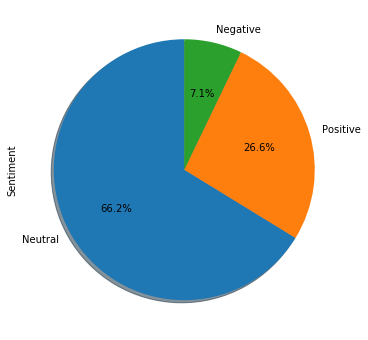

In [14]:
value_counts=df["Sentiment"].value_counts()
value_counts.plot(kind="pie",figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)

In [15]:


df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_values', 'counts']
df_value_counts.to_csv("table2.csv")

sentiment_data =[[positive,negative,neutral]]

Sentiment_table1=pd.DataFrame(data=sentiment_data,columns=["Positive", "Negative","Neutral"])
Sentiment_table1.to_csv('Sentiment_cleaned_table1.csv')
Sentiment_table1

In [16]:
#sentiment analysis using the NLTK VADER library

#sentiment detection for the cleaned data using the NLTK VADER
comp1=[]


sid = SentimentIntensityAnalyzer()

def detect_polarity_nltk1(text):
    comp1.append(sid.polarity_scores(text)['compound'])
    return sid.polarity_scores(text)

df['polarity'] = df.Cleaned_tweet.apply(detect_polarity_nltk1)

table3=pd.DataFrame({'Compound': comp1})

for i in range(len(df["User"])):
    if (table3['Compound'].iloc[i]>0.5):
        df["Sentiment"].iloc[i]="Positive"
    elif (table3['Compound'].iloc[i]<-0.5):
        df["Sentiment"].iloc[i]="Negative"
    else:
        df["Sentiment"].iloc[i]="Neutral"



df.to_csv('clean_lib2.csv')

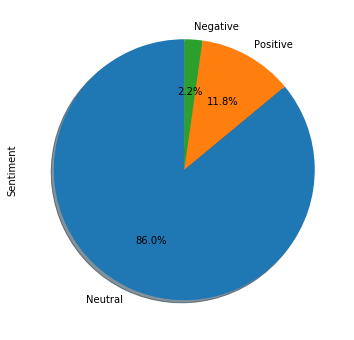

In [17]:
value_counts=df["Sentiment"].value_counts()
value_counts.plot(kind="pie",figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)

In [18]:
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_values', 'counts']
df_value_counts.to_csv("table3.csv")

In [19]:
# sentiment detection for the un cleaned tweets using NLTK VADER


comp2=[]

def detect_polarity_nltk2(text):
    comp2.append(sid.polarity_scores(text)['compound'])
    return sid.polarity_scores(text)

df['polarity'] = df.Tweet.apply(detect_polarity_nltk2)

table4=pd.DataFrame({'Compound': comp2})

for i in range(len(df["User"])):
    if (table4['Compound'].iloc[i]>0.5):
        df["Sentiment"].iloc[i]="Positive"
    elif (table4['Compound'].iloc[i]<-0.5):
        df["Sentiment"].iloc[i]="Negative"
    else:
        df["Sentiment"].iloc[i]="Neutral"

df.to_csv('non_clean_lib2.csv')
df

,User,Tweet,Location,Retweet Count,Date,Cleaned_tweet,polarity,Sentiment
0,pallaviaswal,RT : Launched #SAHAS World's first #entrepr...,Delhi,6,2020-06-12 16:29:49,institut saha rt launch first entrepreneur ini...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Neutral
1,BharatGundagoni,"Today video conference of Bjym Nizambad Dist,a...","Hyderabad, India",0,2020-06-12 16:29:15,today garu nizambad confer dugyala dist co lew...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,AjayPandey__,RT : Some people think #boycottchina is impra...,"New Delhi, India",37,2020-06-12 16:22:30,peopl boycottchina rt think sonamwangchuk atma...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,ManojGoelBJP,Creating short-term job opportunities for #mig...,"New Delhi, India",0,2020-06-12 16:20:23,skill focus https creat co short opportun job ...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",Positive
4,delhi_iihm,RT : Launched #SAHAS World's first #entrepr...,NaN,6,2020-06-12 16:19:16,institut saha rt launch first entrepreneur ini...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Neutral
...,...,...,...,...,...,...,...,...
15853,All4Congress,"With the biggest-ever jump on Friday\n- 9,851 ...","Karnataka, India",4,2020-06-06 01:12:41,ever https case open co death tahbdmrmc friday...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
15854,Newaashirainwe1,Chance makes our parents; but choice makes our...,"Gujarat, India",0,2020-06-06 01:06:25,saturdaythought saturdaymorn https c make frie...,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",Positive
15855,Shalini86442066,RT : The news that 69 yrs old #AtlasCycle Com...,NaN,405,2020-06-06 01:06:00,amp product vri news yrs rt laid hs old atlasc...,"{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compou...",Negative
15856,Ashokghanghas2,RT : 2/2\n• Greece: allowance of €800\n• Sout...,"Haryana, India",69,2020-06-06 01:05:18,greec per low netherland rt household incom al...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",Neutral


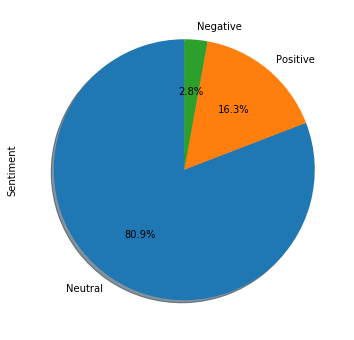

In [20]:
value_counts=df["Sentiment"].value_counts()
value_counts.plot(kind="pie",figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)

In [21]:
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_values', 'counts']
df_value_counts.to_csv("table4.csv")